## UN Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I've downloaded the following data on 10/3/2024 from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD) and renamed the .csv file gdp_per_capital.csv. This data is used subsequently throughout the remainder of the notebook.

### Guided Practice:

### Bonus: Solo Exploration:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [6]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [7]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


gdp_df.sample(10)

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df = (
    gdp_df
    .drop(columns="Value Footnotes")
    .rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
)

6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [12]:
gdp_df.shape
print(f"The number of rows and columns for gdp_df are {gdp_df.shape} and are read as (row,column) respectively.")

The number of rows and columns for gdp_df are (7662, 3) and are read as (row,column) respectively.


In [13]:
print(f"The types of data in gdp_df are listed as follows:"), 

print (gdp_df.dtypes)

The types of data in gdp_df are listed as follows:
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [15]:
gdp_df.value_counts('Year').sort_index()
#gdp_df['Year'].value_counts()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

1990 all the way to 2022. Alot of the years that are more recent have moreobservations that older years. 

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?


In [18]:
print (f"The number of countries is listed under 'Length:'")
gdp_df.value_counts('Country')
# can also do gdp_df['Country'].value_counts()

The number of countries is listed under 'Length:'


Country
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

242 countries. These are smaller countries or island countries so they may not have the biggest population or the means to be well represented here. 

9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [21]:
#Locating the year 2021 within the gdp_df dataframe
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [23]:
gdp_2021['GDP_Per_Capita'].describe()

count       241.000000
mean      20711.570080
std       20916.978968
min         714.066712
25%        5044.196028
50%       13754.802423
75%       30974.370692
max      115683.493708
Name: GDP_Per_Capita, dtype: float64

11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Text(0.5, 1.0, 'Histogram of GDP_Per_Capita in 2021')

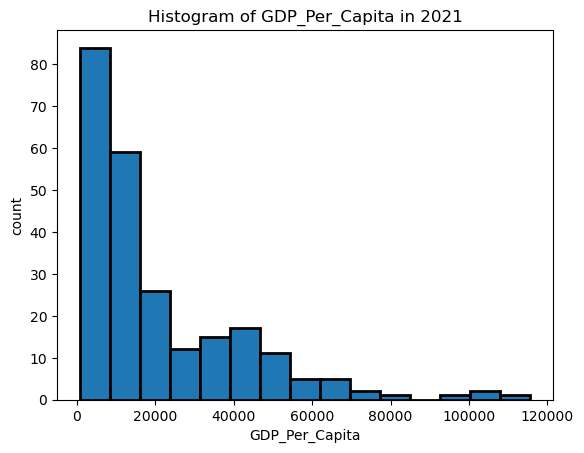

In [25]:
plt.hist(
    data = gdp_2021,
    x= 'GDP_Per_Capita',
    bins = 15,
    edgecolor = 'black',
    linewidth=2
);
plt.xlabel('GDP_Per_Capita')
plt.ylabel('count')
plt.title('Histogram of GDP_Per_Capita in 2021')

The distribution is very right skewed. 

12. Find the top 5 countries and bottom 5 countries by GDP per capita in 2021.

In [28]:
print(f"The top 5 and bottom 5 countries for GDP per Capita in 2021 are shown below:")
      
gdp_2021.sort_values('GDP_Per_Capita')

The top 5 and bottom 5 countries for GDP per Capita in 2021 are shown below:


,Country,Year,GDP_Per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809
...,...,...,...
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436


13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [30]:
gdp_pivoted = gdp_df.pivot_table(values = 'GDP_Per_Capita', index ='Country', columns = 'Year')

In [31]:
#searching years 1990 & 2021 for anything not equal to 0 and using only that data (essentially omitting anything with a value of 0).
gdp_pivoted = gdp_pivoted[(gdp_pivoted[1990] != 0) & (gdp_pivoted[2021] != 0)]

In [32]:
#dropping null values with drop NA for subset yrs 1990 & 2021
gdp_pivoted = gdp_pivoted.dropna(subset =[1990,2021])
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3593.299065,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4026.231916,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11361.252492,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11360.637612,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2897.564287,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7257.729273,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,14801.332173,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316


In [33]:
#in class example on how else to do this in one step!
(
    gdp_df
    [gdp_df['Year'].isin([1990,2021])]
    .pivot_table(columns='Year', values='GDP_Per_Capita', index= 'Country')
    .dropna(subset=[1990,2021])
)

Year,1990,2021
Country,,
Africa Eastern and Southern,3037.297466,3519.174840
Africa Western and Central,2788.301039,4014.607965
Albania,4827.027705,14595.944386
Algeria,8828.874473,11029.138782
Angola,5793.084512,5911.835657
...,...,...
Vanuatu,2774.138350,2800.493866
Viet Nam,2099.394649,10628.219166
World,9705.981267,17055.357429


14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [35]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3037.297466,2955.642238,2823.940366,2737.731240,2715.131116,2764.305017,2838.692029,2886.566235,2867.960243,2873.553735,...,3642.875373,3658.533588,3654.578815,3659.059097,3661.360566,3648.220302,3455.023119,3519.174840,3553.913370,15.865334
Africa Western and Central,2788.301039,2750.790764,2743.855561,2644.709683,2575.064177,2561.665446,2612.194795,2654.384927,2676.529845,2649.555854,...,4146.994622,4148.547272,4055.943254,4051.271199,4064.079894,4093.442853,3957.933804,4014.607965,4063.857691,43.980435
Albania,4827.027705,3496.369626,3264.820757,3598.810267,3921.614970,4471.601702,4908.932392,4400.312754,4819.067832,5474.849914,...,11586.817446,11878.437602,12291.842060,12770.991863,13317.119264,13653.182207,13278.369769,14595.944386,15501.662931,202.379544
Algeria,8828.874473,8517.376962,8471.527605,8109.883559,7869.270272,8013.123442,8195.860480,8147.878198,8435.035658,8584.071496,...,11561.259795,11751.634119,11888.322967,11809.483033,11725.877741,11627.279918,10844.770764,11029.138782,11187.382303,24.921232
Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,4739.509639,...,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657,5906.115677,2.049878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2774.138350,2791.234277,2792.995619,2744.802774,2921.951671,2881.194012,2879.028977,2950.105180,2916.075253,2858.098879,...,2917.677875,2859.399276,2921.808406,3031.243172,3045.095418,3070.404050,2848.970240,2800.493866,2785.903860,0.950043
Viet Nam,2099.394649,2177.473744,2317.266668,2455.508783,2623.720022,2825.016443,3039.938041,3239.681646,3378.904834,3495.097968,...,7641.909252,8091.090101,8545.702594,9050.688534,9636.012495,10252.004622,10450.622382,10628.219166,11396.531469,406.251608
World,9705.981267,9669.677060,9665.890260,9675.232260,9799.764965,9957.172695,10179.565344,10424.112458,10532.457767,10754.895302,...,15120.730322,15442.986012,15762.038311,16170.193777,16573.992656,16864.894576,16204.169107,17055.357429,17485.934316,75.720074


In [36]:
100* (gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]

Country
Africa Eastern and Southern     15.865334
Africa Western and Central      43.980435
Albania                        202.379544
Algeria                         24.921232
Angola                           2.049878
                                  ...    
Vanuatu                          0.950043
Viet Nam                       406.251608
World                           75.720074
Zambia                          41.342076
Zimbabwe                       -21.799100
Length: 206, dtype: float64

15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [38]:
gdp_pivoted.value_counts([gdp_pivoted['Percent_Change'] <0])
#in class example of how else to find this answer:    (gdp_pivoted['Percent_Change'] <0).sum()

Percent_Change
False             187
True               19
Name: count, dtype: int64

19 countries experienced a negative percent change in GDP per capita from 1990 to 2021

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2022. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [41]:
gdp_pivoted.sort_values(['Percent_Change'], ascending = True)
# in class example of how else to code this:  gdp_pivoted.nlargest(1,'Percent_Change')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Burundi,1175.155086,1209.388158,1190.067435,1153.541309,1103.167298,956.490976,880.309412,867.284265,891.699844,862.006680,...,831.294839,781.579287,764.336602,750.787616,740.448223,729.658463,711.355263,714.066712,708.178317,-39.236385
Dem. Rep. Congo,1750.169739,1550.763705,1346.747222,1128.593145,1034.123387,998.688314,969.808663,900.967796,865.606612,805.277881,...,999.072134,1032.571865,1021.327198,1023.539833,1048.246447,1059.892111,1044.071214,1073.643271,1132.654233,-38.654906
Congo,5007.319245,4986.699205,4978.350838,4790.461157,4400.020297,4453.430838,4522.008454,4402.408095,4470.347075,4240.155997,...,5319.387249,5009.432267,4363.753925,4073.926085,3786.412000,3695.061694,3384.654335,3234.392972,3210.403567,-35.406695
United Arab Emirates,105893.626059,101048.696239,99106.791640,95524.456926,97475.980854,99510.350680,99602.617418,100956.706467,95185.305822,92368.813265,...,64334.091552,68076.635891,71244.585815,71182.370717,71550.554332,71782.153836,67668.286641,69733.793774,74299.012980,-34.147317
Central African Republic,1200.613390,1157.381663,1049.119415,1019.441006,1036.283901,1080.770061,1010.743889,1035.107458,1054.312973,1062.298258,...,765.259554,795.037019,818.395995,839.600009,854.647491,861.766789,847.765012,837.504686,819.192343,-30.243599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Myanmar,581.613311,579.378753,597.202183,635.107184,669.375053,708.504878,746.426565,781.596072,816.526211,875.418497,...,3658.593538,3748.294222,4109.557412,4312.947389,4556.281168,4829.536707,4947.093961,4032.625653,4124.485651,593.351678
East Asia & Pacific (IDA & IBRD),2218.031627,2350.517029,2550.731679,2775.055703,3015.333968,3259.565698,3499.876392,3684.752889,3666.469204,3836.000860,...,11108.380904,11738.607553,12400.285149,13113.364220,13862.310358,14568.640670,14618.556038,15586.699395,16115.185723,602.726652
East Asia & Pacific (excluding high income),2191.972060,2322.907488,2520.737656,2742.360622,2979.737360,3221.096140,3458.675406,3641.511465,3623.587749,3791.281266,...,10984.965475,11608.539002,12263.235967,12968.864325,13709.856140,14408.611619,14458.047242,15415.447708,15937.898618,603.268440


Equitorial Guinea had the highest percent change.

In [43]:
gdp_Equatorial_Guinea = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']

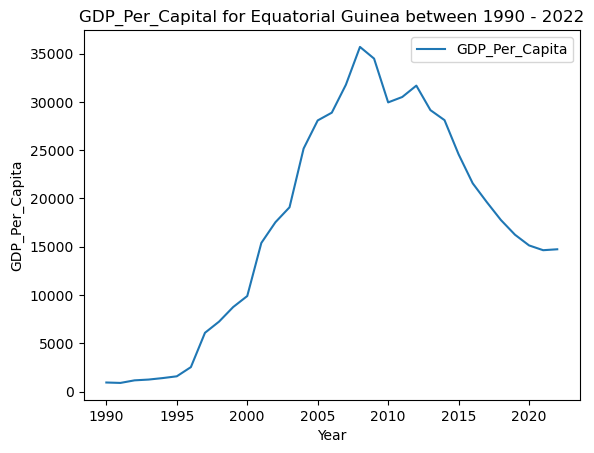

In [44]:
gdp_Equatorial_Guinea.plot(x='Year', y='GDP_Per_Capita', kind='line')
plt.title('GDP_Per_Capital for Equatorial Guinea between 1990 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

In [45]:
gdp_China = gdp_df.loc[gdp_df['Country'] == 'China']

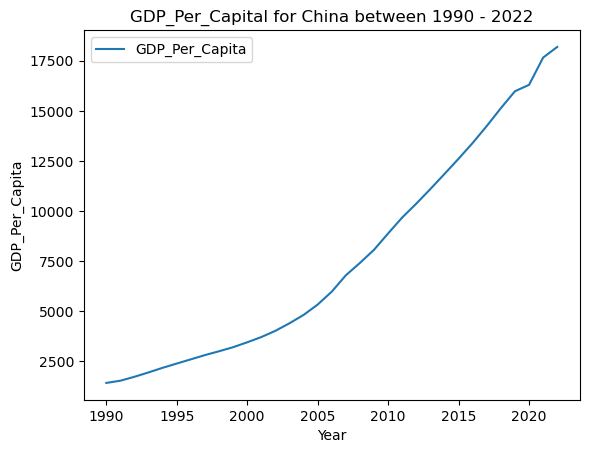

In [46]:
gdp_China.plot(x='Year', y='GDP_Per_Capita', kind='line')
plt.title('GDP_Per_Capital for China between 1990 - 2022')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

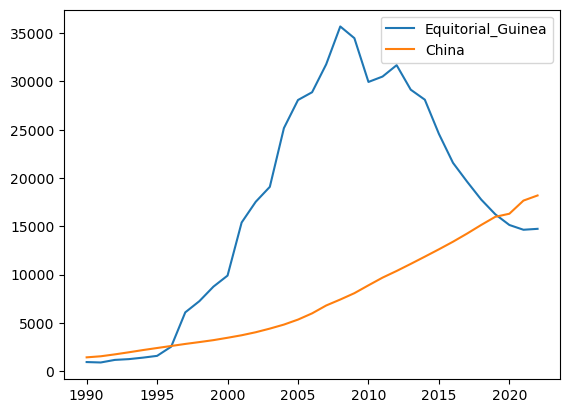

In [47]:
plt.plot(gdp_Equatorial_Guinea['Year'], gdp_Equatorial_Guinea['GDP_Per_Capita'], label = 'Equitorial_Guinea')
plt.plot(gdp_China['Year'], gdp_China['GDP_Per_Capita'], label= 'China')
plt.legend()
plt.show()

17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [49]:
continents = pd.read_csv("../data/continents.csv")
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [51]:
#merging with inner so that we keep only the countries in BOTH DataFrames
gdp_df = pd.merge(gdp_df,continents, how = "inner", on='Country')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
1,Afghanistan,2020,1968.341002,Asia
2,Afghanistan,2019,2079.921861,Asia
3,Afghanistan,2018,2060.698973,Asia
4,Afghanistan,2017,2096.093111,Asia
...,...,...,...,...
5888,Zimbabwe,1994,2670.106615,Africa
5889,Zimbabwe,1993,2458.783255,Africa
5890,Zimbabwe,1992,2468.278257,Africa
5891,Zimbabwe,1991,2781.787843,Africa


19. Determine the number of countries per continent. Create a bar chart showing this.

In [53]:
gdp_df_bar = gdp_df.drop_duplicates('Country').value_counts('Continent')
print (f"The number of countries per continent are listed below:")

gdp_df_bar

The number of countries per continent are listed below:


Continent
Africa           50
Europe           44
Asia             41
North America    26
Oceania          14
South America    11
Name: count, dtype: int64

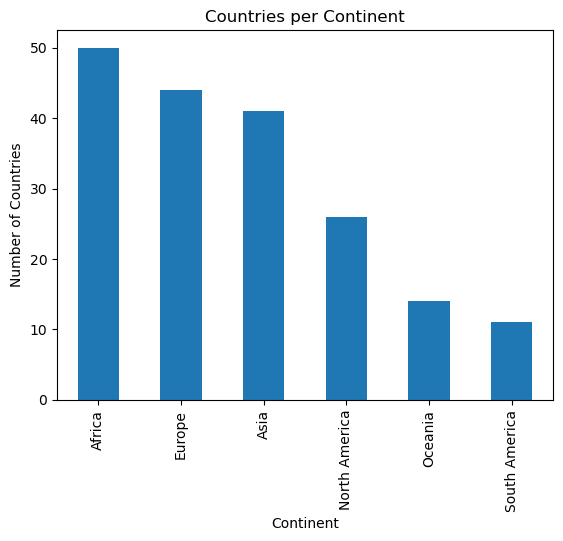

In [54]:
gdp_df_bar.plot(x='Continent', y='Country', kind='bar')
plt.title('Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.show()

20.Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [87]:
gdp_box_2021 = gdp_df.loc[gdp_df['Year'] == 2021]
gdp_box_2021.head(2)

#filtered to year 2021

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia
21,Albania,2021,14595.944386,Europe


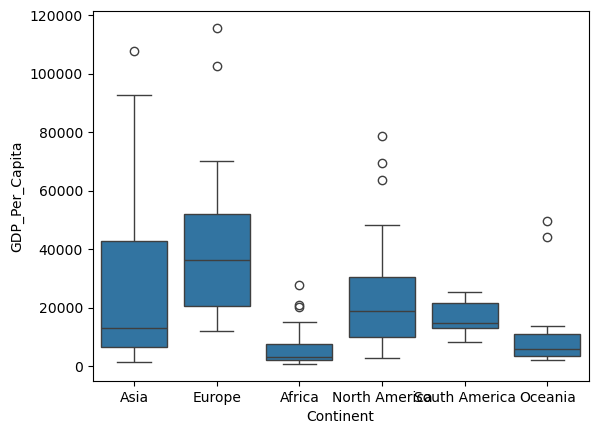

In [89]:
sns.boxplot(x='Continent', y='GDP_Per_Capita', data = gdp_box_2021)
plt.show()

It looks as though multiple continents have outliers. Africa is the overall lowest in terms of GDP_Per_Capita. Europe has the highest mean but Asia has the highest maximum value. 

21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [58]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv", skiprows = 4)
life_expectancy.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.61700,75.90300,76.072000,76.248000,75.72300,74.62600,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.44405,62.92239,63.365863,63.755678,63.31386,62.45459,62.899031,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [60]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'], axis=1)
life_expectancy.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.61700,75.90300,76.072000,76.248000,75.72300,74.62600,74.992000,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.44405,62.92239,63.365863,63.755678,63.31386,62.45459,62.899031,NaN


In [61]:
years = life_expectancy.drop('Country Name', axis = 1)

In [62]:
years =years.columns.to_list()
years

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

In [63]:
life_expectancy = life_expectancy.melt(
    id_vars=['Country Name'], 
    value_vars=years, 
    var_name='Year', 
    value_name='Life_Expectancy'
)
life_expectancy

,Country Name,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,2023,NaN
17020,"Yemen, Rep.",2023,NaN
17021,South Africa,2023,NaN
17022,Zambia,2023,NaN


23. What was the first country with a life expectancy to exceed 80?

In [65]:
print(f"The country below is the first country to have a life expectancy of over 80 years:")
life_expectancy.loc[life_expectancy['Life_Expectancy'] >80].head(1)

The country below is the first country to have a life expectancy of over 80 years:


,Country Name,Year,Life_Expectancy
9695,Japan,1996,80.219756


24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [67]:
#'Year' was created into a list in order to melt the data so, here, turning it back into integer values
life_expectancy['Year']=life_expectancy['Year'].astype(int)

In [68]:
gdp_le = pd.merge(left = gdp_df, 
         right = life_expectancy.rename(columns = {'Country Name': 'Country'}))

In [69]:
gdp_le.head(5)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [70]:
gdp_le.tail()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
5558,Zimbabwe,1994,2670.106615,Africa,52.588
5559,Zimbabwe,1993,2458.783255,Africa,54.426
5560,Zimbabwe,1992,2468.278257,Africa,56.435
5561,Zimbabwe,1991,2781.787843,Africa,58.091
5562,Zimbabwe,1990,2704.757299,Africa,59.426


25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [72]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5403,Uzbekistan,2021,7800.501501,Asia,70.862
5436,Vanuatu,2021,2800.493866,Oceania,70.449
5469,West Bank and Gaza,2021,5641.044400,Asia,73.473
5498,Zambia,2021,3236.788981,Africa,61.223


In [73]:
gdp_over_80 = gdp_le_2021.loc[gdp_le_2021['Life_Expectancy'] >80]

In [74]:
print(f"The following number depicts how many countries had a life excpectancy of at least 80 yrs old in 2021")
gdp_over_80.value_counts().value_counts()

The following number depicts how many countries had a life excpectancy of at least 80 yrs old in 2021


count
1    31
Name: count, dtype: int64

31 countries 

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [77]:
print(f"The following 3 countries had the largest GDP per capita figures in 2021")
gdp_le_2021.nlargest(3,'GDP_Per_Capita')

The following 3 countries had the largest GDP per capita figures in 2021


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2871,Luxembourg,2021,115683.493708,Europe,82.597561
4423,Singapore,2021,107741.118436,Asia,83.092683
2299,Ireland,2021,102785.490239,Europe,82.353659


In [78]:
gdp_largest_2021 = gdp_le[gdp_le['Country'].isin(["Luxembourg", "Singapore", "Ireland"])]
gdp_largest_2021
#creating a variable for only those 3 countries in order to create a valid FacetGrid

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
2298,Ireland,2022,113870.785550,Europe,83.056098
2299,Ireland,2021,102785.490239,Europe,82.353659
2300,Ireland,2020,91356.855054,Europe,82.556098
2301,Ireland,2019,86925.906582,Europe,82.702439
2302,Ireland,2018,83575.599241,Europe,82.204878
...,...,...,...,...,...
4450,Singapore,1994,46865.416894,Asia,76.197561
4451,Singapore,1993,43528.860736,Asia,76.046341
4452,Singapore,1992,40054.049796,Asia,75.946341
4453,Singapore,1991,38705.653871,Asia,75.646341


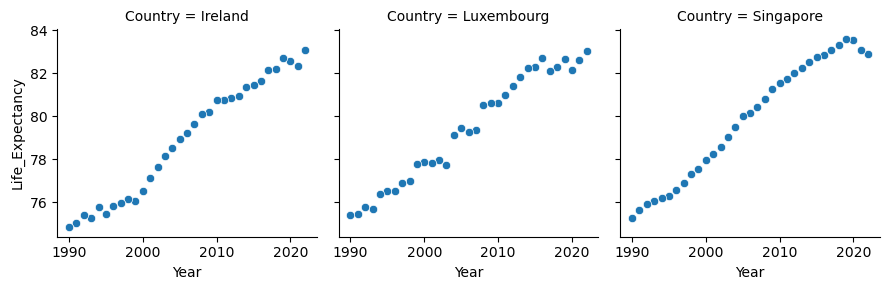

In [79]:
sns.FacetGrid(gdp_largest_2021, col= "Country").map(sns.scatterplot,'Year','Life_Expectancy')

26.Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

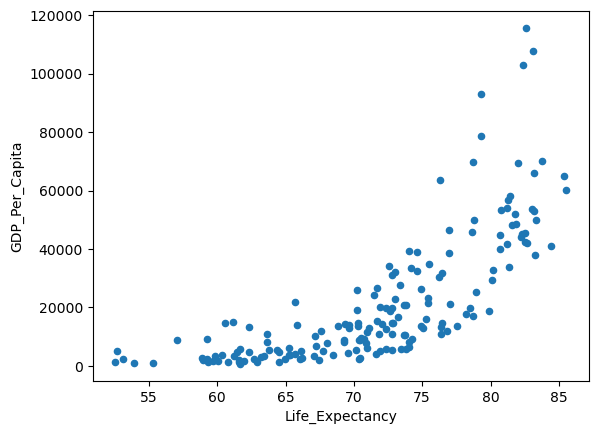

In [81]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life_Expectancy",
    y="GDP_Per_Capita"
);

The data is not linear, it appears exponential in nature.

28.Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [84]:
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.745081
GDP_Per_Capita,0.745081,1.000000


GDP Per Capita and Life Expectancy have a relatively large positive correlation to one another. 

29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [87]:
gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021.head(2)

C:\Users\lexil\AppData\Local\Temp\ipykernel_21680\1277151394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['Log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499


In [88]:
gdp_le_2021[['Life_Expectancy', 'Log_GDP_Per_Capita']].corr()

,Life_Expectancy,Log_GDP_Per_Capita
Life_Expectancy,1.000000,0.846575
Log_GDP_Per_Capita,0.846575,1.000000


The correlation between the log of GDP Per Capital and Life Expectancy is even higher. At a positive correlation of .84

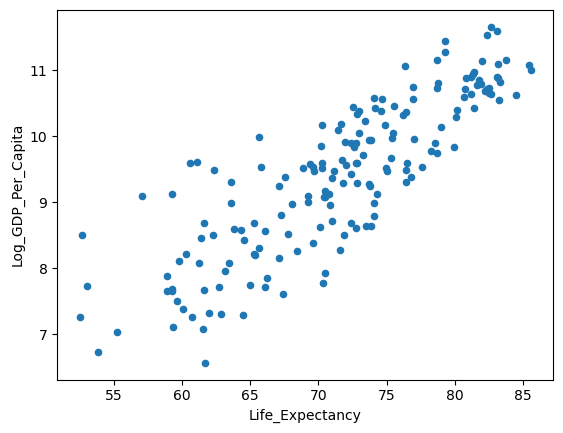

In [90]:
gdp_le_2021.plot(
    kind="scatter",
    x="Life_Expectancy",
    y="Log_GDP_Per_Capita"
);

Much more linear in a positive correlation than the GDP_Per_Capita. 

<h1>UN Data Exploration Bonus Questions</h1>
This set of exercises is designed to give you a chance to try out some more advanced features of the pandas library. These exercises will be using the gdp_le DataFrame that you created for the regular exercises, meaning that it will have columns for Country, Year, GDP_Per_Capita, Continent, and Life_ExpectancyYear column as an int16 type.

1. Let's compare the median life expectacy for each across all of the years of data that we have. Perform a groupby on both Year and Continent and then aggregate using the median and save the results to a new object.

In [94]:
median_life_expectancy = gdp_le.groupby(['Year', 'Continent'])['Life_Expectancy'].median().reset_index()
median_life_expectancy
#using reset index to ensure it reads in as a DataFrame we can work with, not a series. 

,Year,Continent,Life_Expectancy
0,1990,Africa,52.496500
1,1990,Asia,66.957000
2,1990,Europe,74.846073
3,1990,North America,70.713500
4,1990,Oceania,65.508000
...,...,...,...
193,2022,Asia,74.075000
194,2022,Europe,80.080293
195,2022,North America,74.615000
196,2022,Oceania,68.312000


In [95]:
print(f"The resulting types of data are listed below:")
print(median_life_expectancy.dtypes)

The resulting types of data are listed below:
Year                 int64
Continent           object
Life_Expectancy    float64
dtype: object


b. Look at the index of the resulting object. What do you notice about it?

It contains Year, Contient and Life_Expectanct

c. Use .loc to select the median life expectancy for Asia in 2010.

In [99]:
median_life_expectancy.loc[
    (median_life_expectancy['Continent'] == 'Asia') & (median_life_expectancy['Year'] == 2010)
]

,Year,Continent,Life_Expectancy
121,2010,Asia,71.879


d. Use .loc to select the median life expectancy for both Asia and Africa in 2010.

In [101]:
median_life_expectancy.loc[
    (median_life_expectancy['Continent'].isin(['Asia', 'Africa'])) & (median_life_expectancy['Year'] == 2010)
]

,Year,Continent,Life_Expectancy
120,2010,Africa,58.365
121,2010,Asia,71.879


e. Use .loc to select the values for all continents for the year 2010.

In [103]:
median_life_expectancy.loc[
   (median_life_expectancy['Year'] == 2010)
]

,Year,Continent,Life_Expectancy
120,2010,Africa,58.365000
121,2010,Asia,71.879000
122,2010,Europe,78.481415
123,2010,North America,74.190000
124,2010,Oceania,68.030000
125,2010,South America,73.711000


f. Use .loc to select the median life expectancy for Asia across all years. Hint: One way to do this is to use the swaplevels method.

In [105]:
median_life_expectancy.loc[
    (median_life_expectancy['Continent'] == 'Asia') & (median_life_expectancy['Year'])
]

,Year,Continent,Life_Expectancy
7,1991,Asia,67.884500
19,1993,Asia,67.367341
31,1995,Asia,68.223000
43,1997,Asia,69.225000
55,1999,Asia,70.088000
67,2001,Asia,69.887000
79,2003,Asia,70.488500
91,2005,Asia,71.153500
103,2007,Asia,71.266000
115,2009,Asia,69.910000


2. Group gdp_le by both Year and Continent and find the min, median, and max values for both gdp per capita and life expectancy. Hint: You may want to use the agg method.

a. Look at the columns of the resulting object. What do you notice?

In [107]:
gdp_agg = gdp_le.groupby(['Year', 'Continent']).agg(
    gdp_min=('GDP_Per_Capita', 'min'),
    gdp_max=('GDP_Per_Capita', 'max'),
    gdp_median=('GDP_Per_Capita', 'median'),
    le_min=('Life_Expectancy', 'min'),
    le_max=('Life_Expectancy', 'max'),
    le_median=('Life_Expectancy', 'median')
)
gdp_agg

gdp_min        gdp_max    gdp_median     le_min  \
Year Continent                                                             
1990 Africa           460.123697   17559.006114   2199.799280  41.852000   
     Asia             581.613311  105893.626059   5507.061391  53.713000   
     Europe          4827.027705   70860.819124  26781.627609  62.352000   
     North America   3409.794251   65961.406278   9788.684598  52.975000   
     Oceania         2045.272278   31006.100227   3426.440476  59.721000   
...                          ...            ...           ...        ...   
2022 Asia            4001.699955  108036.110993  12304.948125  66.431000   
     Europe         10731.440430  115541.774828  37312.101564  68.587927   
     North America   2799.112561   81165.650944  15106.775175  63.728000   
     Oceania         2002.718218   50997.546433   5116.335518  64.014000   
     South America   8201.183799   34420.067505  15093.465117  64.928000   

                       le_max  le_median  
Year Continent                            
1990 Africa         70.110000  52.496500  
     Asia           78.837073  66.957000  
     Europe         77.536829  74.846073  
     North America  77.436585  70.713500  
     Oceania        76.994634  65.508000  
...                       ...        ...  
2022 Asia           85.377000  74.075000  
     Europe         83.453659  80.080293  
     North America  81.571000  74.615000  
     Oceania        83.200000  68.312000  
     South America  79.519000  73.425000  

[198 rows x 6 columns]

year 2022 appears to have higher life expectancies and higher gdps overall. 

b. Select the median gdp per capita value for Asia in 2010.

In [110]:
median_life_expectancy.loc[
    (median_life_expectancy['Continent'] == 'Asia') & (median_life_expectancy['Year'] == 2010)
]

,Year,Continent,Life_Expectancy
121,2010,Asia,71.879


3. In this question, we'll see how the median gdp per capita has changed over time. Start by creating a Series, gdp_median_per_year by grouping by the Year variable and calculating the median gdp per capita.


a. Convert gdp_median_per_year to a DataFrame by using the reset_index method.

In [112]:
gdp_median_per_year = gdp_le.groupby('Year')['GDP_Per_Capita'].median().reset_index()
gdp_median_per_year.head(2)

,Year,GDP_Per_Capita
0,1990,7137.60372
1,1991,7222.31749


b. The shift method will allow you to compare values across rows. Use this method to create a new column showing the change in gdp per capita since the prior year.

In [114]:
change_gdp =gdp_le['GDP_Per_Capita'] - gdp_le['GDP_Per_Capita'].shift(1)
change_gdp

0              NaN
1       451.324735
2       111.580859
3       -19.222888
4        35.394138
           ...    
5558     28.728344
5559   -211.323360
5560      9.495002
5561    313.509587
5562    -77.030544
Name: GDP_Per_Capita, Length: 5563, dtype: float64

c. How many times was there a drop in median gdp per capita from one year to the next?

In [116]:
(change_gdp < 0).sum()

4069

4. Now, let's expand on the prior question to find the change in GDP from year to year for each country.

a. Add a new column to the gdp_le DataFrame showing the change in gdp per capita from the prior year for that country. Hint: You can combine groupby with the shift method.

In [118]:
gdp_le['change_gdp'] = gdp_le.groupby('Country')['GDP_Per_Capita'].shift(1)

In [119]:
gdp_le['change_gdp'] = gdp_le['GDP_Per_Capita'] - gdp_le['change_gdp']
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,change_gdp
0,Afghanistan,2021,1517.016266,Asia,61.982,NaN
1,Afghanistan,2020,1968.341002,Asia,62.575,451.324735
2,Afghanistan,2019,2079.921861,Asia,63.565,111.580859
3,Afghanistan,2018,2060.698973,Asia,63.081,-19.222888
4,Afghanistan,2017,2096.093111,Asia,63.016,35.394138
...,...,...,...,...,...,...
5558,Zimbabwe,1994,2670.106615,Africa,52.588,28.728344
5559,Zimbabwe,1993,2458.783255,Africa,54.426,-211.323360
5560,Zimbabwe,1992,2468.278257,Africa,56.435,9.495002
5561,Zimbabwe,1991,2781.787843,Africa,58.091,313.509587


b. Which country had the largest one year increase in gdp per capita? Which had the largest one year drop in gdp per capita?

In [121]:
print(f" The following country had the highest one year increase in gdp per capita:")
gdp_le.nlargest(1,'change_gdp')

 The following country had the highest one year increase in gdp per capita:


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,change_gdp
2906,"Macao SAR, China",2019,122822.124456,Asia,84.978,67663.411727


5. When looking at time series data, there can often be a large amount of observation to observation variability, making it more difficult to see general trends. This variability can be smoothed out by calculating rolling averages. We'll see how in this question.

a. First, filter gdp_le down to just the rows for the United States and save the result to a DataFrame named gdp_le_us.

In [123]:
gdp_le_us = gdp_le.loc[gdp_le['Country'] == 'United States']
gdp_le_us.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,change_gdp
5336,United States,2022,64702.978311,North America,77.434146,NaN
5337,United States,2021,63635.823810,North America,76.329268,-1067.1545


b. Use rolling to calculate the 3-year moving average of gdp per capita for the US.

In [125]:
gdp_le_us['rolling_avg'] = gdp_le_us['GDP_Per_Capita'].rolling(window=3).mean()

C:\Users\lexil\AppData\Local\Temp\ipykernel_21680\3239878805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_us['rolling_avg'] = gdp_le_us['GDP_Per_Capita'].rolling(window=3).mean()


c. Plot both the original gdp per capita values and the rolling average on the same plot.

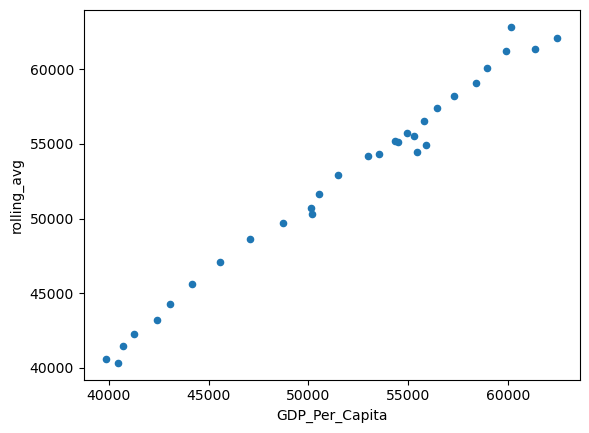

In [127]:
gdp_le_us.plot(
    kind="scatter",
    x="GDP_Per_Capita",
    y="rolling_avg"
);

6. When working with large datasets, it can sometimes pay off to be mindful of what data types you are using for each variable.

a. Create a new column, Continent_Category by converting the Continent column to a category.

In [129]:
gdp_le['Continent_Category'] = gdp_le['Continent'].astype('category')
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,change_gdp,Continent_Category
0,Afghanistan,2021,1517.016266,Asia,61.982,NaN,Asia
1,Afghanistan,2020,1968.341002,Asia,62.575,451.324735,Asia


b. Use the memory_usage method to compare the memory used by the original Continent column compared to the category version.

In [131]:
gdp_le['Continent'].memory_usage(deep=True)

312294

In [132]:
gdp_le['Continent_Category'].memory_usage(deep=True)

6210

c. You can also sometimes get speedups for groupby operations by using category datatypes. In Jupyter, if you want to estimate how long it takes to run a block of code, you can add the %%timeit magic to the top of a cell. Compare doing a groupby + aggregation on the original Continent column compared to the Continent_Category column.

In [134]:
%%timeit
gdp_le.groupby('Continent').agg(
    gdp_min=('GDP_Per_Capita', 'min')
)

2.33 ms ± 61.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [135]:
%%timeit
gdp_le.groupby('Continent_Category').agg(
    gdp_min=('GDP_Per_Capita', 'min')
)

<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

2.3 ms ± 101 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<magic-timeit>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

d. You can also sometimes save memory usage by adjusting the size that is stored for integer values. By default, the int64 type is used which can store values between –9223372036854775808 and 9223372036854775807. However, for the Year variable, we really don't need that large of a range. We could get by with a 16 bit integer, whose range is -32768 to 32768. Convert the Year column to int16 type and then compare the memory usage.

In [210]:
for Year in gdp_le.columns:
    if gdp_le['Year'].dtype == 'int64':
        gdp_le['Year'] = gdp_le['Year'].astype('int16')
print(gdp_le.dtypes)

Country                 object
Year                     int16
GDP_Per_Capita         float64
Continent               object
Life_Expectancy        float64
change_gdp             float64
Continent_Category    category
dtype: object


e. Finally, you don't have to make these datatype changes after the data has been read in. Add some parameters to the read_csv call that imports the GDP data. Read in only the needed columns (not the Value Footnotes column). Also, read in the Country or Area column as a category type and the Year column as an int16 type.

In [ ]:
pd.read_csv("../data/gdp_per_capita.csv)